# Problem --

Prepare a classification model using Naive Bayes for salary data

#### Data Description:

age -- age of a person

workclass -- A work class is a grouping of work

education -- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation -- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual

In [204]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

In [205]:
salary_train= pd.read_csv('C:/Users/ancha/Downloads/SalaryData_Train.csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [206]:
salary_test=pd.read_csv('C:/Users/ancha/Downloads/SalaryData_Test.csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [207]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [208]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [209]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [210]:
salary_train.shape

(30161, 14)

In [211]:
salary_train.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [212]:
#Dropping the duplicate records in train data
salary_train2=salary_train.drop_duplicates()
salary_train2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [213]:
#Find Categorical variables
salary_cat_var=[var for var in salary_train2.columns if salary_train2[var].dtypes == 'O']

print('There are {} categorical variables\n'.format(len(salary_cat_var)))
print('The categorical variables are :\n\n', salary_cat_var)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [214]:
salary_train2[salary_cat_var].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [215]:
salary_train2[salary_cat_var].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

### Explore categorical variables.

In [298]:
#Frequency counts.
for var in salary_cat_var:
    print(salary_train2[var].value_counts())

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other

In [217]:
#Frequency distribution of categorical variables.
for var in salary_cat_var:
    print(salary_train2[var].value_counts()/np.float(len(salary_train2)))

 Private             0.714158
 Self-emp-not-inc    0.090362
 Local-gov           0.074862
 State-gov           0.046575
 Self-emp-inc        0.038992
 Federal-gov         0.034531
 Without-pay         0.000520
Name: workclass, dtype: float64
 HS-grad         0.307326
 Some-college    0.219046
 Bachelors       0.167379
 Masters         0.057912
 Assoc-voc       0.046686
 Assoc-acdm      0.036948
 11th            0.034978
 10th            0.028621
 7th-8th         0.020109
 Prof-school     0.019775
 9th             0.016690
 Doctorate       0.013530
 12th            0.013307
 5th-6th         0.010519
 1st-4th         0.005538
 Preschool       0.001636
Name: education, dtype: float64
 Married-civ-spouse       0.459837
 Never-married            0.311750
 Divorced                 0.149017
 Separated                0.034494
 Widowed                  0.030368
 Married-spouse-absent    0.013753
 Married-AF-spouse        0.000781
Name: maritalstatus, dtype: float64
 Prof-specialty       0.14061

In [222]:
#Find Numerical variables
salary_num_var=[num for num in salary_train2.columns if salary_train2[num].dtype !='O']

print('There are {} numerical variables\n'.format(len(salary_num_var)))
print('The numerical variables are:',salary_num_var)

There are 5 numerical variables

The numerical variables are: ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [223]:
salary_train2[salary_num_var].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [225]:
#Missing values in numerical variables.
salary_train2[salary_num_var].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

### Explore numerical variables.

In [296]:
#Frequency count.
for num in salary_num_var:
    print(salary_train2[num].value_counts())

31    769
36    757
33    748
34    743
37    740
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
9     8268
10    5893
13    4503
14    1558
11    1256
12     994
7      941
6      770
4      541
15     532
5      449
16     364
8      358
3      283
2      149
1       44
Name: educationno, dtype: int64
0        24379
15024      331
7688       266
7298       238
99999      147
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64
0       25485
1902      194
1977      160
1887      153
1848       49
        ...  
2080        1
4356        1
2282        1
1844        1
1411        1
Name: capitalloss, Length: 90, dtype: int64
40    11858
50     2504
45     1642
60     1344
35     1138
      ...  
82        1
94        1
92        1
87        1
74        1
Name: hoursperweek, Length: 94, dtype: int64


In [297]:
#Frequency distribution of numerical variables.
for num in salary_num_var:
    print(salary_train2[num].value_counts()/np.float(len(salary_train2)))

31    0.028584
36    0.028138
33    0.027804
34    0.027618
37    0.027506
        ...   
82    0.000260
83    0.000186
88    0.000112
85    0.000112
86    0.000037
Name: age, Length: 72, dtype: float64
9     0.307326
10    0.219046
13    0.167379
14    0.057912
11    0.046686
12    0.036948
7     0.034978
6     0.028621
4     0.020109
15    0.019775
5     0.016690
16    0.013530
8     0.013307
3     0.010519
2     0.005538
1     0.001636
Name: educationno, dtype: float64
0        0.906181
15024    0.012303
7688     0.009887
7298     0.008847
99999    0.005464
           ...   
1639     0.000037
6097     0.000037
2538     0.000037
1455     0.000037
1086     0.000037
Name: capitalgain, Length: 118, dtype: float64
0       0.947292
1902    0.007211
1977    0.005947
1887    0.005687
1848    0.001821
          ...   
2080    0.000037
4356    0.000037
2282    0.000037
1844    0.000037
1411    0.000037
Name: capitalloss, Length: 90, dtype: float64
40    0.440769
50    0.093075
45    0.061034


# Labeling Features

In [226]:
salary_train_lab=salary_train2.copy()

for i, column in enumerate(salary_train_lab.columns,1):
    if salary_train_lab[column].dtype!='object':
        continue
        
    label_encoder=preprocessing.LabelEncoder()
    salary_train_lab[column]=label_encoder.fit_transform(salary_train_lab[column])

In [227]:
salary_train_lab

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [228]:
salary_test_lab= salary_test.copy()
for i, column in enumerate(salary_test_lab.columns,1):
    if salary_test_lab[column].dtype!='object':
        continue
        
    label_encoder= preprocessing.LabelEncoder()
    salary_test_lab[column]=label_encoder.fit_transform(salary_test_lab[column])

In [229]:
salary_test_lab

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# Split data into separate training and test dataset

In [263]:
X_train= salary_train_lab.drop('Salary',axis=1)
y_train= salary_train_lab['Salary']

X_test= salary_test_lab.drop('Salary',axis=1)
y_test= salary_test_lab['Salary']


In [267]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26903, 13)
(15060, 13)
(26903,)
(15060,)


# Modeling with Naive Bayes Classifiers:

In [287]:
def report(model):
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    print('\nMoldel train Accuracy score:',np.round(accuracy_score(y_train,model.predict(X_train))*100,2),'%')
    print('\nMoldel test Accuracy score:',np.round(accuracy_score(y_test,model.predict(X_test))*100,2),'%')
    print('\n classification_report:\n',classification_report(y_test,preds))
    print('\n confusion matrix:\n')
    
    cmt=confusion_matrix(y_test, preds)
    fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PuOr')
    plt.show()
     

# Gaussian Naive Bayes 


Moldel train Accuracy score: 79.34 %

Moldel test Accuracy score: 79.56 %

 classification_report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88     11360
           1       0.68      0.32      0.44      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060


 confusion matrix:



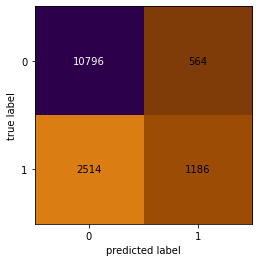

In [288]:
model_gnb= GaussianNB()
report(model_gnb)


# Multinomial Naive Bayes


Moldel train Accuracy score: 76.83 %

Moldel test Accuracy score: 77.5 %

 classification_report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060


 confusion matrix:



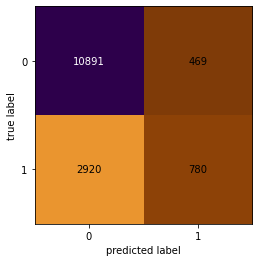

In [290]:
model_mnb= MultinomialNB()
report(model_mnb)

# Categorical Naive Bayes


Moldel train Accuracy score: 85.39 %

Moldel test Accuracy score: 85.62 %

 classification_report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     11360
           1       0.73      0.66      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.81      0.79      0.80     15060
weighted avg       0.85      0.86      0.85     15060


 confusion matrix:



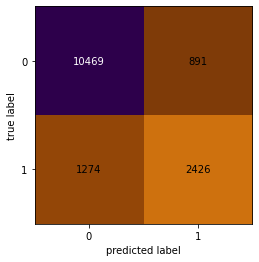

In [292]:
model_cnb= CategoricalNB()
report(model_cnb)

# Conclusion

In [294]:
models= {'Model':pd.Series(['Guassian Naive Bayes','Multinominal Naive Bayes','Categorical Naive Bayes']),
         'Train score(in %)':pd.Series([np.round(accuracy_score(y_train,model_gnb.predict(X_train))*100,2),
                                       np.round(accuracy_score(y_train,model_mnb.predict(X_train))*100,2),
                                       np.round(accuracy_score(y_train,model_cnb.predict(X_train))*100,2)]),
     'Test Score(in %)':pd.Series([np.round(accuracy_score(y_test,model_gnb.predict(X_test))*100,2),
                                  np.round(accuracy_score(y_test,model_mnb.predict(X_test))*100,2),
                                  np.round(accuracy_score(y_test,model_cnb.predict(X_test))*100,2)])}
     
models_tab=pd.DataFrame(models)
models_tab

,Model,Train score(in %),Test Score(in %)
0,Guassian Naive Bayes,79.34,79.56
1,Multinominal Naive Bayes,76.83,77.50
2,Categorical Naive Bayes,85.39,85.62


As per above calculations, the Categorical Naive Bayes method is providing the highest level of accuracy i.e, 86%